In [1]:
from src.simulator import Simulator
from src.parameters import ModelParameters
from src.plotter import Plotter

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_formats = ['svg']

## Model Parameters

In [3]:
m1 = 0.5
m2 = 0.5
L1 = 0.5
L2 = 0.5
l2 = 0.5*L2
l1 = 0.5*L1
I1 = m1*l1**2
I2 = m2*l2**2
f1 = 0.1
f2 = 0.1

In [4]:
model_params_sim = ModelParameters

model_params_sim.m1 = m1
model_params_sim.m2 = m2
model_params_sim.L1 = L1
model_params_sim.L2 = L2
model_params_sim.l1 = l2
model_params_sim.l2 = l1
model_params_sim.I1 = I1
model_params_sim.I2 = I2
model_params_sim.f1 = f1
model_params_sim.f2 = f2

## Simulation

In [5]:
sim = Simulator(dt=0.025)
sim.set_model_params(model_params_sim)

In [6]:
x0 = [1, -1, 0, 0]
steps = 400

x_sim = np.ndarray((steps, 4))
x_sim[0] = x0

E_kin_sim = np.ndarray(steps-1)
E_pot_sim = np.ndarray(steps-1)

for i in range(steps-1):
  E_kin_sim[i], E_pot_sim[i] = sim.calculate_energies(x_sim[i])
  x_sim[i+1] = sim.simulate_step(x=x_sim[i])

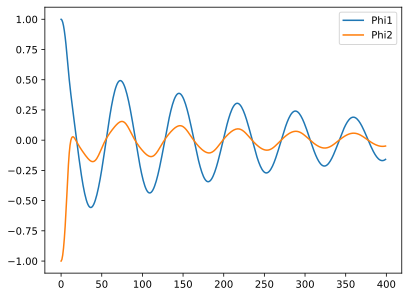

In [7]:
plt.plot(x_sim[:,0], label="Phi1")
plt.plot(x_sim[:,1], label="Phi2")
plt.legend()
plt.show()

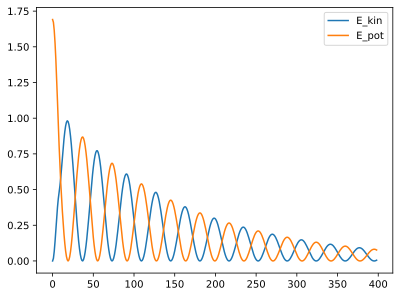

In [8]:
plt.plot(E_kin_sim, label='E_kin')
plt.plot(E_pot_sim, label='E_pot')
plt.legend()
plt.show()

In [9]:
plotter = Plotter
plotter.animate_pendulum(x_sim[:,0], x_sim[:,1], model_params_sim.L1, model_params_sim.L2, dt=0.025)